In [1]:
import matplotlib.pyplot as plt
# Will allow us to embed images in the notebook
%matplotlib inline

random_state = 666

import pandas as pd
dataset = pd.read_csv("../common/dataset.csv")

# set(dataset["SEX"]) = {nan, 'M', 'F'}
fields = {'SEX'}
for field in fields:
    dataset = pd.get_dummies(dataset[field], prefix=field).join(dataset.drop([field], 1))

# Assume other == Nan
# set(dataset["EDUCATION"]) = {nan, 'high school', 'graduate school', 'other', 'university'}
# set(dataset["MARRIAGE"]) = {nan, 'other', 'single', 'married'}
education_dict = { 'other': 0, 'high school': 0.1, 'university': 0.5, 'graduate school': 1}
marriage_dict = {'other': 0, 'single': 0.1, 'married': 1}
dataset['EDUCATION'] = dataset['EDUCATION'].fillna('other').apply(lambda x: education_dict[x])
dataset['MARRIAGE'] = dataset['MARRIAGE'].fillna('other').apply(lambda x: marriage_dict[x])

dataset['BIRTH_DATE'] = pd.to_datetime(dataset['BIRTH_DATE'], format='%d/%m/%Y')
from datetime import date
def calculate_age(birth_date):
    today = date.today()
    age = today.year - birth_date.year
    full_year_passed = (today.month, today.day) < (birth_date.month, birth_date.day)
    if not full_year_passed:
        age -= 1
    return age
dataset['AGE'] = dataset['BIRTH_DATE'].apply(lambda x: calculate_age(x))
dataset = dataset.drop(["BIRTH_DATE"], 1)
dataset['AGE'] = dataset['AGE'].fillna(dataset['AGE'].mean())

fields = ['LIMIT_BAL',
          'BILL_AMT_DEC', 'BILL_AMT_NOV', 'BILL_AMT_OCT', 'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
          'PAY_AMT_DEC', 'PAY_AMT_NOV', 'PAY_AMT_OCT', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL']
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

rs.fit(dataset[fields])
dataset[fields] = rs.transform(dataset[fields])

rs.fit(dataset['AGE'])
dataset['AGE'] = rs.transform(dataset['AGE'])

fields = ['PAY_DEC', 'PAY_NOV', 'PAY_OCT', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL']
rs.fit(dataset[fields])
dataset[fields] = rs.transform(dataset[fields])

dataset = dataset.drop(['CUST_COD'], 1)

C:\Users\Alessandro\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:986: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Alessandro\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1008: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Alessandro\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:986: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data 

In [80]:
print(dataset.shape)
dataset.head(10)

(26884, 25)


,SEX_F,SEX_M,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,...,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT PAYMENT JAN,AGE
0,0,1,-0.473684,0.5,0.1,0.0,0.0,0.0,0.0,2.0,...,0.040830,0.070589,0.224271,0.716841,0.116590,-0.403524,-0.132494,0.128858,0,0.114474
1,0,1,0.263158,0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.373816,-0.363142,0.722651,0.803505,-0.199174,-0.403524,-0.397483,-0.386573,1,-0.076923
2,1,0,0.368421,0.1,1.0,0.0,0.0,-1.0,-1.0,-2.0,...,-0.385233,-0.366589,-0.024919,3.805065,-0.303862,-0.403524,-0.397483,-0.128858,0,0.538462
3,1,0,0.842105,1.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,-0.323469,-0.176753,0.150012,1.265634,0.281273,0.233775,2.255316,1.484183,0,0.384615
4,1,0,-0.105263,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.020276,-0.353111,0.473461,-0.243428,-0.442069,4.734683,-0.397483,-0.386573,1,0.307692
5,0,1,-0.315789,0.5,0.1,2.0,0.0,0.0,0.0,0.0,...,0.803575,0.862103,0.377025,0.260713,0.043721,0.161410,0.185492,0.139424,1,-0.538462
6,0,1,-0.631579,0.5,1.0,1.0,2.0,0.0,0.0,0.0,...,0.021242,0.069904,-0.523299,-0.170688,-0.274472,-0.174591,0.052998,-0.386573,1,-0.230769
7,1,0,1.157895,0.5,0.1,-1.0,-1.0,-1.0,-1.0,0.0,...,-0.348293,-0.353111,1.933715,1.565958,0.751032,-0.403524,-0.397483,2.008633,0,-0.076923
8,0,1,-0.473684,0.5,0.1,2.0,0.0,0.0,0.0,0.0,...,0.352256,-0.018774,0.224271,-0.171408,-0.286131,-0.238886,-0.081616,-0.231944,1,-0.769231
9,1,0,-0.473684,0.5,1.0,0.0,0.0,0.0,0.0,0.0,...,0.163967,0.205246,-0.024919,0.357940,0.043721,1.748604,0.662471,0.554088,1,-0.769231


In [3]:
target_col_name = 'DEFAULT PAYMENT JAN'
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.33, random_state=random_state, stratify=dataset[target_col_name])
# print(train[train["DEFAULT PAYMENT JAN"] == 1].shape[0] / train.shape[0])
# print(test[test["DEFAULT PAYMENT JAN"] == 1].shape[0] / test.shape[0])
# print(dataset[dataset["DEFAULT PAYMENT JAN"] == 1].shape[0] / dataset.shape[0])
X = train.drop([target_col_name], 1)
y = train[target_col_name].tolist()
X_test = test.drop([target_col_name], 1)
y_test = test[target_col_name].tolist()
print(X.shape)
print(X_test.shape)

(18012, 24)
(8872, 24)


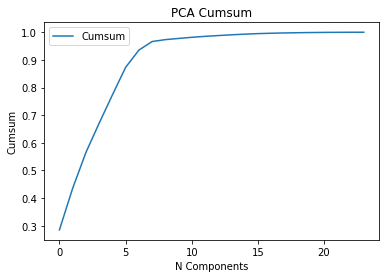

cumsum_tresh = 0.99, n_components = 13


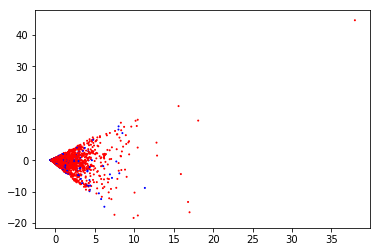

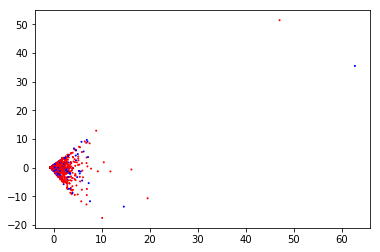

In [36]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X)
cumsum = pca.explained_variance_ratio_.cumsum()

cumsum = sorted(list(cumsum))
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(random_state)
plt.figure(1)
plt.plot(cumsum, label='Cumsum')
plt.xlabel('N Components')
plt.ylabel('Cumsum')
plt.title('PCA Cumsum')
plt.legend(loc='best')
plt.show()
cumsum_tresh = 0.99
for i in np.arange(0,len(cumsum)):
    if cumsum[i] >= cumsum_tresh:
        break
n_components = i
print('cumsum_tresh = {}, n_components = {}'.format(cumsum_tresh, n_components))
# pca = PCA(whiten=True, n_components=n_components)
# pca.fit(X)
# X = pca.transform(X)
# X_test = pca.transform(X_test)

pca = PCA(whiten=True, n_components=2)
pca.fit(X)
colors = {0:'r', 1:'b'}
df = pd.DataFrame(pca.transform(X))
fig, ax = plt.subplots()
ax.scatter(df[0], df[1], c=pd.DataFrame(y)[0].apply(lambda x: colors[x]), s=1)
plt.show()
df = pd.DataFrame(pca.transform(X_test))
fig, ax = plt.subplots()
ax.scatter(df[0], df[1], c=pd.DataFrame(y)[0].apply(lambda x: colors[x]), s=1)
plt.show()

In [4]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)
from sklearn.metrics import make_scorer, confusion_matrix

def cost_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    # first index true
    # second index predicted
    return cm[0][0] * 0 + cm[0][1] * 1 + cm[1][0] * 5 + cm[1][1] * 0
ms = make_scorer(cost_matrix, greater_is_better=False)

def test_clf(X, y, y_pred, X_test, y_test, y_pred_test):
    from sklearn.metrics import f1_score
    f1_train = f1_score(y, y_pred)  
    f1_test = f1_score(y_test, y_pred_test)
    print('f1_train = {:3f}\t f1_test = {:3f}'.format(f1_train, f1_test))
    cost_train = cost_matrix(y, y_pred)
    cost_test = cost_matrix(y_test, y_pred_test)
    print('cost_train = {}\t cost_test = {}'.format(format(cost_train, ','), format(cost_test, ',')))
    from sklearn.metrics import confusion_matrix
    cm_train = confusion_matrix(y, y_pred)
    cm_test = confusion_matrix(y_test, y_pred_test)
    print('cm_train = \n{}\ncm_test = \n{}'.format(cm_train, cm_test))
    
print('Defined functions')

Defined functions


In [52]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(random_state=random_state)
clf.fit(X, y)
test_clf(X, y, clf.predict(X), X_test, y_test, clf.predict(X_test))

f1_train = 0.220658	 f1_test = 0.224531
cost_train = 18,618	 cost_test = 9,136
cm_train = 
[[10932  3098]
 [ 3104   878]]
cm_test = 
[[5369 1541]
 [1519  443]]


In [47]:
from sklearn import svm
clf = svm.SVC(random_state=random_state, C=1, class_weight='balanced')
clf.fit(X, y)
test_clf(X, y, clf.predict(X), X_test, y_test, clf.predict(X_test))

f1_train = 0.585584	 f1_test = 0.528490
cost_train = 9,314	 cost_test = 5,382
cm_train = 
[[11831  2199]
 [ 1423  2559]]
cm_test = 
[[5773 1137]
 [ 849 1113]]


In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=random_state, max_depth=4, class_weight='balanced')
clf.fit(X, y)
test_clf(X, y, clf.predict(X), X_test, y_test, clf.predict(X_test))

f1_train = 0.534257	 f1_test = 0.526829
cost_train = 10,623	 cost_test = 5,349
cm_train = 
[[11562  2468]
 [ 1631  2351]]
cm_test = 
[[5701 1209]
 [ 828 1134]]


In [36]:
from sklearn.naive_bayes import GaussianNB
# No random_state
# The priors are set based on class distribution in the dataset
# No CV needed
clf = GaussianNB()
clf.fit(X, y)
test_clf(X, y, clf.predict(X), X_test, y_test, clf.predict(X_test))

f1_train = 0.520231	 f1_test = 0.524620
cost_train = 10,981	 cost_test = 5,354
cm_train = 
[[11484  2546]
 [ 1687  2295]]
cm_test = 
[[5666 1244]
 [ 822 1140]]


In [58]:
from sklearn.ensemble import RandomForestClassifier
# class_weight = None -> f1_test = 0.461438
# class_weight = 'balanced' -> f1_test = 0.436867 -> It improves detection of 0 and decreases detection of 1............
clf = RandomForestClassifier(random_state=random_state, n_estimators=67, class_weight=None)
clf.fit(X, y)
test_clf(X, y, clf.predict(X), X_test, y_test, clf.predict(X_test))

f1_train = 0.998869	 f1_test = 0.461438
cost_train = 41	 cost_test = 6,667
cm_train = 
[[14029     1]
 [    8  3974]]
cm_test = 
[[6508  402]
 [1253  709]]


[[-0.00323425  0.         -0.02892477  0.          0.01963398  0.50109365
   0.08970107  0.05080505  0.03338401  0.03266334  0.         -0.09180851
   0.          0.          0.          0.          0.         -0.03137117
  -0.03304247 -0.01475577 -0.01491018 -0.01899735  0.          0.09119577]]
f1_train = 0.484255	 f1_test = 0.485282
cost_train = 11,255	 cost_test = 5,556
cm_train = 
[[10190  3840]
 [ 1483  2499]]
cm_test = 
[[5064 1846]
 [ 742 1220]]


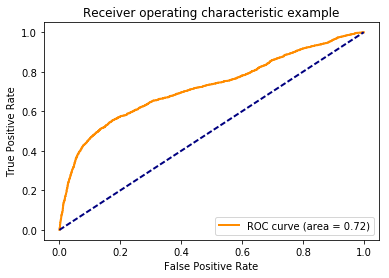

In [77]:
from sklearn.linear_model import LogisticRegression
# l1 0.01 balanced f1_test = 0.485282
# l2 0.01 balanced f1_test = 0.483491
clf = LogisticRegression(penalty='l1', C=0.01, class_weight='balanced', fit_intercept=True, random_state=random_state, n_jobs=-1)
clf.fit(X, y)
print(clf.coef_)
test_clf(X, y, clf.predict(X), X_test, y_test, clf.predict(X_test))

from sklearn.metrics import roc_curve, auc

y_score = clf.decision_function(X_test)
# Compute ROC curve and ROC area for each class
fpr, tpr, t = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# t_sigm = 1 / (1 + np.exp(-t))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)

parameters = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]}
clf = LogisticRegression(penalty='l1', class_weight='balanced', fit_intercept=True, random_state=random_state, n_jobs=1)

#parameters = {'class_weight':['balanced', None], 'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
#clf = tree.DecisionTreeClassifier(random_state=random_state)

#parameters = {'C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]}
#clf = svm.SVC(random_state=random_state, class_weight='balanced')

#parameters = {'n_estimators': np.arange(1,100)}
#clf = RandomForestClassifier(random_state=random_state, class_weight='balanced')

#parameters = {'priors': [[0.1, 0.9], [0.2, 0.8], [0.5, 0.5], [0.8, 0.2], [0.9, 0.1]]}
#clf = GaussianNB()

scoring_name = 'f1'
n_jobs = -1
if scoring_name == ms:
    n_jobs = 1
gscv = GridSearchCV(estimator=clf, param_grid=parameters, n_jobs=n_jobs, cv=cv, scoring=scoring_name)
gscv.fit(X, y)
print('GridSearchCV done')
print(gscv.best_params_)
print(scoring_name + ' = ' + str(gscv.best_score_))

GridSearchCV done
{'C': 0.01}
f1 = 0.483636757462


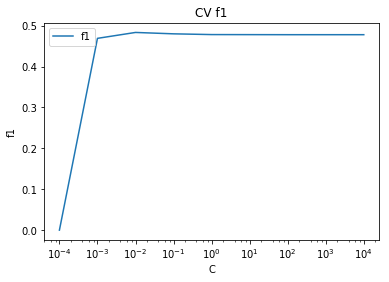

In [78]:
plt.figure(1)
if scoring_name == ms:
    scoring_name = 'Cost'
#plt.plot([prior[0] for prior in parameters['priors']], gscv.cv_results_['mean_test_score'], label=scoring_name)
#plt.plot(parameters['n_estimators'], gscv.cv_results_['mean_test_score'], label=scoring_name)
#plt.plot(parameters['C'], gscv.cv_results_['mean_test_score'], label=scoring_name)
plt.semilogx(parameters['C'], gscv.cv_results_['mean_test_score'], label=scoring_name)
#plt.plot(parameters['max_depth'], gscv.cv_results_['mean_test_score'], label=scoring_name)
plt.xlabel('C')
plt.ylabel(scoring_name)
plt.title('CV ' + scoring_name)
plt.legend(loc='best')
plt.show()

In [ ]:
# clf = clf.fit(train_features, train_target)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10, random_state=random_state, shuffle=True)
# scores_nstkfold = cross_val_score(clf, train_features, train_target, cv=10)
scores_stkfold = cross_val_score(clf, train_features, train_target, scoring='f1', cv=cv)
predicted_f1_test = scores_stkfold.mean()

In [ ]:
target = pd.read_csv("./common/target.csv")
target = target.drop([target_col_name], 1)
target_nan = target[pd.isnull(target).any(axis=1)]